In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_metric_stats.csv")
df.head()

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_male_18_24_enrolled_in_uni,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled
0,"Aberdeen, SD Micro Area",1520.0,904.0,391.0,53.0,536.0,739.0,1148.0,612.0,367.0,...,0.392956,0.395795,0.000000,0.002285,0.455595,0.046763,0.059493,0.804947,0.658869,0.261658
1,"Aberdeen, WA Micro Area",1952.0,1656.0,1133.0,36.0,505.0,761.0,1301.0,990.0,588.0,...,0.202899,0.237874,0.000000,0.000000,0.472003,0.019700,0.014950,0.819273,0.797222,0.285132
2,"Abilene, TX Metro Area",7241.0,3986.0,2673.0,1010.0,2434.0,2444.0,5633.0,2715.0,1260.0,...,0.335657,0.444170,0.002839,0.000856,0.509581,0.136252,0.017817,0.687428,0.642614,0.306709
3,"Ada, OK Micro Area",1368.0,847.0,455.0,122.0,509.0,639.0,1331.0,606.0,295.0,...,0.420624,0.550712,0.000000,0.003559,0.556127,0.050684,0.015361,0.575053,0.500158,0.338503
4,"Adrian, MI Micro Area",3007.0,2219.0,1456.0,235.0,715.0,1175.0,2638.0,1465.0,805.0,...,0.374664,0.469093,0.000000,0.017495,0.510421,0.053154,0.001802,0.875166,0.602836,0.290667


In [2]:
!pip install fuzzywuzzy

In [2]:
# df.area_name.str.split(",")[0]

In [3]:
(df[["p_black", "p_white"]] < df[["p_black", "p_white"]].loc[172]).mean()

p_black    0.78806
p_white    0.20796
dtype: float64

In [4]:
trim_df = df.query("n_people > 150000")

def get_city_stats(df, city, state=None):
    loc_inds = df.area_name.str[:-len(", AA Metro Area")].str.contains(city)
    df_sub = df.loc[loc_inds]
    if state:
        states = df_sub["area_name"].str.extract(r"\,(.*)", expand=False)
        loc_inds = states.str.contains(state)
        df_sub = df_sub.loc[loc_inds]
    return df_sub

# metric_dict = {
#     "p_female_given_thin_unmarried_20_24_not_enrolled": 1,
#     "p_female_thin_unmarried_20_24_not_enrolled": 1,
# #     "p_unmarried_20_24_female": 1,
#     "median_income_males_living_alone": -1,
#     "median_rent_1_bed": -1,
# #     "percent_obese_fem": -1,
#     #"log10_n_people": 1,
#     #"p_black_given_unmarried": -1,
# #     "p_not_enrolled_given_20_24": 1,
# }

def eval_city(df, city, state=None):
    df_sub = get_city_stats(df, city, state)
    cols = [
        "p_black", "p_unmarried_20_24_female", 
#         "p_female_given_thin_unmarried_20_24_not_enrolled",
        "median_income_males_living_alone",
        "median_rent_1_bed",
        "percent_obese_fem",
        "p_not_enrolled_given_20_24"
    ]
    print("{}, {} stats:".format(city, state))
    if len(df_sub) != 1:
        display(df_sub[["area_name"] + cols])
        raise Exception
    
    percent_df = pd.DataFrame({
        col: [df_sub[col].values[0], np.mean(df[col] < df_sub[col].values[0])]
        for col in cols
    })
    foo = pd.DataFrame({
        "area_name": [df_sub["area_name"].values[0]]*2,
#         "stat_type": ["raw", "percentile"]
    })
    percent_df = foo.join(percent_df)
    percent_df.index = ["raw", "percentile"]
    return percent_df

eval_city(trim_df, "Cleveland", "OH") 

Cleveland, OH stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Cleveland-Elyria, OH Metro Area",0.198902,0.488849,34866.000000,666.000000,36.60000,0.607238
percentile,"Cleveland-Elyria, OH Metro Area",0.818182,0.800699,0.472028,0.325175,0.84965,0.500000


In [5]:
eval_city(trim_df, "Miami", "FL")

Miami, FL stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Miami-Fort Lauderdale-Pompano Beach, FL Metro ...",0.212404,0.479529,37430.00000,1102.00000,27.800000,0.521644
percentile,"Miami-Fort Lauderdale-Pompano Beach, FL Metro ...",0.846154,0.608392,0.65035,0.91958,0.265734,0.223776


In [12]:
eval_city(trim_df, "Burl", "NC")

Burl, NC stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Burlington, NC Metro Area",0.195476,0.519306,29564.000000,629.000000,37.000000,0.515622
percentile,"Burlington, NC Metro Area",0.811189,0.993007,0.157343,0.223776,0.867133,0.206294


In [98]:
eval_city(trim_df, "Chicago", "IL")

Chicago, IL stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",0.165530,0.483914,43551.000000,966.000000,27.500000,0.579511
percentile,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",0.762238,0.688811,0.870629,0.846154,0.244755,0.381119


In [99]:
eval_city(trim_df, "Hartford", "CT")

Hartford, CT stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Hartford-East Hartford-Middletown, CT Metro Area",0.113476,0.476841,43701.000000,926.000000,28.900000,0.501544
percentile,"Hartford-East Hartford-Middletown, CT Metro Area",0.608392,0.552448,0.874126,0.811189,0.318182,0.164336


In [100]:
eval_city(trim_df, "Pittsburgh", "PA")

Pittsburgh, PA stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Pittsburgh, PA Metro Area",0.081240,0.485802,36389.000000,690.000000,27.700000,0.567798
percentile,"Pittsburgh, PA Metro Area",0.517483,0.737762,0.594406,0.398601,0.255245,0.353147


In [101]:
eval_city(trim_df, "Eugene", "OR")

Eugene, OR stats:


,area_name,p_black,p_unmarried_20_24_female,median_income_males_living_alone,median_rent_1_bed,percent_obese_fem,p_not_enrolled_given_20_24
raw,"Eugene-Springfield, OR Metro Area",0.010886,0.484732,26546.000000,735.000000,28.200000,0.507699
percentile,"Eugene-Springfield, OR Metro Area",0.076923,0.706294,0.087413,0.513986,0.286713,0.181818


# Metric importance

1. p_unmarried_20_24_female (positive)
2. median_income_males_living_alone
2. m_f_income_ratio (negative - want lower male income and higher female income)
3. female obesity (negative - want low female obesity)
3. m_f obesity diff (positive - want higher male obesity and lower female obesity)
4. median rent (negative)
5. p_black (negative)

In [30]:
for col in df.columns:
    print(col)

area_name
n_unmarried_males_20_24
n_unmarried_males_25_29
n_unmarried_males_30_34
n_married_males_20_24
n_married_males_25_29
n_married_males_30_34
n_unmarried_females_20_24
n_unmarried_females_25_29
n_unmarried_females_30_34
n_married_females_20_24
n_married_females_25_29
n_married_females_30_34
n_males_18_24_middle_school_dropout
n_males_18_24_high_school_dropout
n_males_18_24_ged
n_males_18_24_college_dropout
n_males_18_24_associates
n_males_18_24_bachelors
n_males_18_24_grad
n_females_18_24_middle_school_dropout
n_females_18_24_high_school_dropout
n_females_18_24_ged
n_females_18_24_college_dropout
n_females_18_24_associates
n_females_18_24_bachelors
n_females_18_24_grad
n_households
n_white_households
n_black_households
n_amerindian_households
n_asian_households
n_islander_households
n_mixed_households
n_hispanic_households
median_income_males_living_alone
median_income_females_living_alone
p_male_disabled
p_female_disabled
p_white_disabled
p_black_disabled
p_amerindian_disabled
p

X is NOT EFFICIENT if for all utility fns U, there exists point Y != X
such that U(x) < U(Y). So regardless of weighting, X has a superior.

So X is efficient if there exists utility fn U st for all points Y != X, U(X) >= U(Y)

The convex efficient frontier should be a subset of my monotonic efficient frontier

Suppose X is a collection of points on the efficient frontier. I want to find y not in X
such that for some x in X, all points in the dataset lie on one side of the line btw x and y

-----
Okay so MEF is the monotonic efficient frontier. $CEF \subset MEF$. $X$ is the set of all cities, but I don't think I need to worry about that. I just want all points $a,b \in MEF$ st all points $c$ lie on or on one side of the line btw $a$ and $b$

$O(n^2)$ complexity is fine

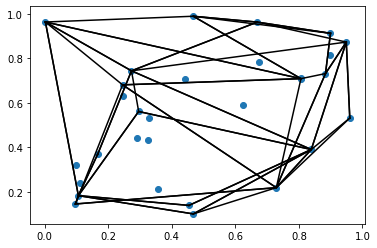

In [31]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
rng = np.random.default_rng()
points = rng.random((30, 3))   # 30 random points in 2-D
hull = ConvexHull(points)

import matplotlib.pyplot as plt

def plot_points(hull):
    points = hull.points
    plt.plot(points[:,0], points[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plot_points(hull)

In [32]:
hull.vertices

array([ 2,  3,  4,  7,  9, 10, 12, 15, 17, 18, 19, 20, 22, 23, 24, 26, 27,
       29], dtype=int32)

In [33]:
hull.vertices.shape, points.shape

((18,), (30, 3))

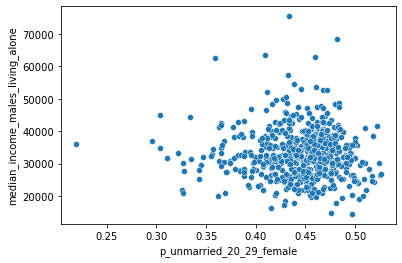

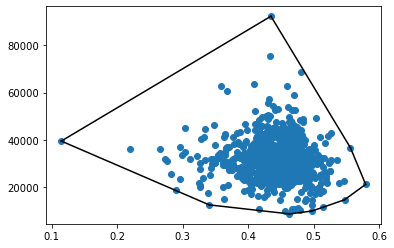

In [34]:
import seaborn as sns
sns.scatterplot(x="p_unmarried_20_29_female", y="median_income_males_living_alone", data=df.dropna())
plt.show()
hull = ConvexHull(df[["p_unmarried_20_29_female", "median_income_males_living_alone"]].dropna())
hull.points.shape, hull.vertices.shape
plot_points(hull)

In [35]:
df[["area_name", "p_unmarried_20_29_female", "median_income_males_living_alone"]].dropna().iloc[hull.vertices]

,area_name,p_unmarried_20_29_female,median_income_males_living_alone
497,"Los Alamos, NM Micro Area",0.434914,92337.0
831,"Susanville, CA Micro Area",0.114735,39438.0
704,"Raymondville, TX Micro Area",0.340699,12394.0
532,"Mayagüez, PR Metro Area",0.463251,8569.0
931,"Yauco, PR Metro Area",0.496965,9773.0
763,"Santa Isabel, PR Micro Area",0.514706,11411.0
167,"Clarksdale, MS Micro Area",0.547360,14570.0
370,"Helena-West Helena, AR Micro Area",0.579596,21082.0
42,"Atchison, KS Micro Area",0.556317,36620.0


9it [00:00, 642.81it/s]

5
Aguadilla-Isabela, PR Metro Area
759
San Juan-Bayamón-Caguas, PR Metro Area
293
Florence, SC Metro Area


,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_male_18_24_enrolled_in_uni,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled
5,"Aguadilla-Isabela, PR Metro Area",9685.0,7641.0,4949.0,182.0,1269.0,2411.0,8915.0,5658.0,3896.0,...,0.448582,0.571418,0.006300,0.000000,NaN,0.027263,0.000526,0.721876,0.512153,NaN
759,"San Juan-Bayamón-Caguas, PR Metro Area",70147.0,58260.0,37717.0,1629.0,7856.0,14951.0,67372.0,54626.0,36849.0,...,0.462230,0.562029,0.003194,0.003735,NaN,0.146692,0.001764,0.645600,0.511831,NaN
293,"Florence, SC Metro Area",5776.0,4360.0,2769.0,283.0,1662.0,2493.0,6065.0,4799.0,2936.0,...,0.313978,0.446802,0.001391,0.009356,0.58522,0.597249,0.006433,0.380834,0.636146,0.366717


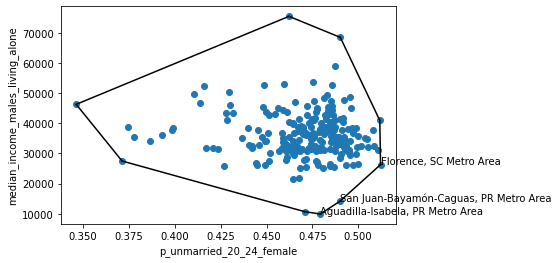

In [36]:
from tqdm import tqdm

def efficient_frontier_finder(df, metric_dict, plot_points=False):
    """
    a point X is on the efficient frontier if DNE point Y st
    (metric(X) <= metric(Y) for all metrics)
    i'm kind of extending the defn of "efficient frontier" in markowitz portfolio analysis
    """
    metric_items = metric_dict.items()
    metric_cols, metric_signs = list(zip(*metric_dict.items()))
    metric_cols = np.array(metric_cols)
    metric_signs = np.array(metric_signs, dtype=int)
    assert len(metric_cols) == len(metric_signs)
    efficient_inds = []
    
    hull = ConvexHull(df[metric_cols].dropna())
    hull_inds = hull.vertices
    hull_df = df[["area_name", *metric_cols]].dropna().iloc[hull_inds]
    
    for i, rowi in tqdm(hull_df.iterrows()):
        if not rowi[metric_cols].isnull().any():
            # find Y that is at least as good on all metrics
            metric_diffs = (hull_df[metric_cols] - rowi[metric_cols]) * metric_signs
            y_not_worse = (metric_diffs >= 0).all(axis=1)
            if y_not_worse.sum() == 1: # will always match w itself
                efficient_inds.append(i)
    if plot_points:
        fig, ax = plt.subplots()
        ax.plot(hull.points[:,0], hull.points[:,1], 'o')
        for simplex in hull.simplices:
            ax.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-')
        for ind in efficient_inds:
            print(ind)
            print(hull_df["area_name"].loc[ind])
            ax.annotate(hull_df["area_name"].loc[ind], (hull_df.loc[ind][1:3]))
        plt.xlabel(metric_cols[0])
        plt.ylabel(metric_cols[1])
        
    return df.loc[hull_df.loc[efficient_inds].index]

            
efficient_points = efficient_frontier_finder(df.query("n_people >= 200000"), {"p_unmarried_20_24_female": 1, 
                                                  "median_income_males_living_alone":-1}, True)
efficient_points

In [37]:
df["log10_n_people"] = np.log10(df["n_people"])

In [38]:
trim_df = df.query("n_people > 150000")
# trim_df = df.query("n_people > 200000")

In [39]:
df["p_black"].loc[df.area_name.str.contains("Lauderdale")]

548    0.212404
973         NaN
Name: p_black, dtype: float64

In [43]:
for place in ["Charlottesville", "Portland", "Eugene", "Tallahassee", "Gainesville", "New York"]:
    display(df[["area_name", "p_black_given_unmarried", "p_black",
                "p_unmarried_20_24_female", *list(metric_dict.keys())]].loc[df.area_name.str.contains(place)])

,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
159,"Charlottesville, VA Metro Area",0.157108,0.11998,0.511779,0.538252,0.403086,40966.0,981.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
685,"Portland-South Portland, ME Metro Area",0.033967,0.020522,0.481558,0.586720,0.429327,36883.0,840.0
686,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",0.041954,0.028352,0.481951,0.539473,0.367134,42792.0,1106.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
272,"Eugene-Springfield, OR Metro Area",0.016672,0.010886,0.484732,0.542764,0.366938,26546.0,735.0
956,"Eugene, OR Metro Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
836,"Tallahassee, FL Metro Area",0.428685,0.327292,0.510587,0.539966,0.383172,31061.0,838.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
316,"Gainesville, FL Metro Area",0.226059,0.178725,0.486799,0.521663,0.353823,25382.0,799.0
317,"Gainesville, GA Metro Area",0.111505,0.072206,0.464973,0.548024,0.344858,34724.0,810.0
318,"Gainesville, TX Micro Area",0.061582,0.028096,0.492080,0.384561,0.242108,35372.0,638.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",0.236501,0.173251,0.492352,0.52463,0.40922,47606.0,1319.0


In [40]:
trim_df = df.query("(n_people > 150000) & (p_black_given_unmarried <= 0.3) & (p_black <= 0.2)")
print(trim_df.shape)

metric_dict = {
    "p_female_given_thin_unmarried_20_24_not_enrolled": 1,
    "p_female_thin_unmarried_20_24_not_enrolled": 1,
#     "p_unmarried_20_24_female": 1,
    "median_income_males_living_alone": -1,
    "median_rent_1_bed": -1,
#     "percent_obese_fem": -1,
    #"log10_n_people": 1,
    #"p_black_given_unmarried": -1,
#     "p_not_enrolled_given_20_24": 1,
}
eff_df = efficient_frontier_finder(trim_df, metric_dict, plot_points=False)
print(eff_df.shape)
# eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", *extra_cols]]
eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", 
                                                                 "p_black_given_unmarried",
                                                                 "p_unmarried_20_24_female", 
                                                                 *list(metric_dict.keys())]]

49it [00:00, 821.03it/s]

(233, 141)
(23, 141)


,area_name,p_black_given_unmarried,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
423,"Johnson City, TN Metro Area",0.054201,0.496923,0.533129,0.332631,26287.0,569.0
737,"Saginaw, MI Metro Area",0.289886,0.491170,0.569520,0.337053,29612.0,535.0
722,"Rockford, IL Metro Area",0.194755,0.490376,0.569911,0.349149,34682.0,565.0
216,"Daphne-Fairhope-Foley, AL Metro Area",0.178167,0.490328,0.655536,0.442081,34180.0,784.0
316,"Gainesville, FL Metro Area",0.226059,0.486799,0.521663,0.353823,25382.0,799.0
272,"Eugene-Springfield, OR Metro Area",0.016672,0.484732,0.542764,0.366938,26546.0,735.0
772,"Scranton--Wilkes-Barre, PA Metro Area",0.074737,0.479819,0.530776,0.362738,32083.0,607.0
376,"Hilo, HI Micro Area",0.008314,0.477727,0.587172,0.408423,28295.0,873.0
775,"Sebastian-Vero Beach, FL Metro Area",0.162136,0.476064,0.548684,0.397811,32418.0,804.0
217,"Davenport-Moline-Rock Island, IA-IL Metro Area",0.142286,0.475408,0.548876,0.378519,35282.0,627.0


In [19]:
df.loc[df.area_name.str.contains("Lauderdale")].p_black_given_unmarried

548    0.300804
973         NaN
Name: p_black_given_unmarried, dtype: float64

In [ ]:
# unmarried_age_col = "p_unmarried_25_29_female"
unmarried_age_col = "p_unmarried_20_24_female"
# unmarried_age_col = "p_unmarried_20_29_female"

metric_dict = {
    unmarried_age_col: 1, # more unmarried women per unmarried men
    "median_income_males_living_alone": -1,
    #"median_income_females_living_alone": 1,
    #"m_f_income_ratio": -1,
    #"percent_obese_male": 1,
    #"percent_obese_fem": -1,
    #"p_gay": 1,
    #"m_f_obesity_diff": 1,
    "p_black": -1,
    "median_rent_1_bed": -1,
}

extra_cols = [
    unmarried_age_col, 
    "median_income_males_living_alone",
    "median_income_females_living_alone",
    "percent_obese_male",
    "percent_obese_fem",
    "p_black",
    "median_rent_1_bed",
    "p_gay",
    "n_people"
]

eff_df = efficient_frontier_finder(trim_df, metric_dict, plot_points=False)
print(eff_df.shape)
# eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", *extra_cols]]
eff_df.sort_values(unmarried_age_col, ascending=False)[["area_name", *extra_cols]]

In [ ]:
def evaluate_area(area_name, metric_cols):
    vals = df.loc[df["area_name"] == area_name, metric_cols].iloc[0]
    #vals = df.query("area_name == '%s'".format(area_name))[metric_cols]
    for metric_col, val in zip(metric_cols, vals):
        p = (trim_df[metric_col] < val).mean()
        print("%s == %.3f \t\t higher than %.3f of big metro areas"%(metric_col, val, p))
foo = metric_dict.keys()
for area_name in [
    "Portland-Vancouver-Hillsboro, OR-WA Metro Area",
    "New York-Newark-Jersey City, NY-NJ-PA Metro Area",
    "Seattle-Tacoma-Bellevue, WA Metro Area",
    "San Francisco-Oakland-Berkeley, CA Metro Area",
    "San Jose-Sunnyvale-Santa Clara, CA Metro Area",
    "Charlottesville, VA Metro Area",
    "Tallahassee, FL Metro Area",
    "Chicago-Naperville-Elgin, IL-IN-WI Metro Area",
    
]:
    print(area_name, "----------------------")
    evaluate_area(area_name, foo)

In [ ]:
trim_df["p_unmarried_20_24_female"].describe()

In [ ]:
trim_df["p_black"].describe()

In [ ]:
sns.regplot(x="p_unmarried_20_24_female", y="p_black", data=trim_df)

In [ ]:
trim_df[extra_cols].median()

In [ ]:
trim_df.sort_values("p_white", ascending=False).iloc[0:30]

In [ ]:
pr_df = df.query("(n_people > 100000)")
pr_df = pr_df.loc[pr_df["area_name"].str.contains(", PR")]
pr_df
# efficient_frontier_finder(pr_df, metric_cols, metric_signs).sort_values("p_unmarried_20_24_female", ascending=False)

In [ ]:
df.query("(n_people > 150000) & (p_unmarried_20_24_female > 0.49)")\
.sort_values("m_f_income_ratio", ascending=True)\
[["area_name"] + extra_cols].head(20)

In [ ]:
df["p_cuban"] = df["n_cuban"] / df["n_people"]
df.sort_values("p_cuban", ascending=False)\
[["area_name", *extra_cols]].iloc[0:20]

In [ ]:
df.loc[df.area_name.str.contains("Chicago")]

In [ ]:
df.loc[df.area_name.str.contains("Chicago"), ["area_name"]+extra_cols]

In [ ]:
df.area_name.isin(eff_df.area_name).rename("foo")

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
# ax.set(xscale="log")

sns.regplot(x="median_income_males_living_alone", y="percent_obese_fem",
            ax=ax,
            #hue=df.area_name.str.contains("Brownsville"), 
            scatter=False,
            data=trim_df)
sns.scatterplot(x="median_income_males_living_alone", y="percent_obese_fem", 
                hue="p_unmarried_20_24_female",
                ax=ax,
            #hue=df.area_name.str.contains("Brownsville"), 
                #style=df.area_name.isin(eff_df.area_name).rename("is_efficient"),
            data=trim_df)
plt.title("Male income vs female obesity rates")
#              data=trim_df.loc[trim_df.area_name.str.endswith("TX Metro Area")])

In [ ]:
trim_df["median_income_males_living_alone"].describe()

In [ ]:
sns.scatterplot(x="median_income_males_living_alone", y="percent_obese_fem", 
                hue="p_unmarried_20_24_female",
                style=eff_df["area_name"].str.contains("Brownsville"),
            data=eff_df)
# sns.regplot(x="median_income_males_living_alone", y="percent_obese_fem", 
#             #hue=df.area_name.str.contains("Brownsville"), 
#             scatter=False,
#             data=trim_df)
plt.show()

In [ ]:
trim_df.loc[trim_df.area_name.str.contains("TX Metro Area"), ["area_name"] + extra_cols].sort_values("p_unmarried_20_24_female")